In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import scipy as sp
import seaborn as sns

In [3]:
# import edges file
res1 = pd.read_csv('/Users/samson/Desktop/python/python_work/university/semester_2/digital_media/tutorials/project/nodes_res1.csv')
res2 = pd.read_csv('/Users/samson/Desktop/python/python_work/university/semester_2/digital_media/tutorials/project/nodes_res2.csv')
res05 = pd.read_csv('/Users/samson/Desktop/python/python_work/university/semester_2/digital_media/tutorials/project/nodes_res05.csv')
res025 = pd.read_csv('/Users/samson/Desktop/python/python_work/university/semester_2/digital_media/tutorials/project/nodes_res025.csv')
res15 = pd.read_csv('/Users/samson/Desktop/python/python_work/university/semester_2/digital_media/tutorials/project/nodes_res15.csv')

# Task 1a

In [4]:
res1

,Id,Label,modularity_class,indegree,outdegree,Degree,weighted indegree,weighted outdegree,Weighted Degree,Eccentricity,closnesscentrality,harmonicclosnesscentrality,betweenesscentrality,clustering
0,0,NaN,11,577,256,833,577,256,833,7,0.335777,0.362346,1.549175e+07,0.014676
1,1,NaN,11,4,11,15,4,11,15,8,0.252292,0.262687,5.212718e+04,0.190909
2,379,NaN,11,10,5,15,10,5,15,8,0.259680,0.271019,4.839465e+04,0.166667
3,41,NaN,2,1646,384,2030,1646,384,2030,7,0.354032,0.384665,5.649754e+07,0.008165
4,810,NaN,16,165,0,165,165,0,165,0,0.000000,0.000000,0.000000e+00,0.031966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35771,35771,NaN,8,0,3,3,0,3,3,10,0.179231,0.183003,0.000000e+00,0.000000
35772,35772,NaN,531,0,1,1,0,1,1,1,1.000000,1.000000,0.000000e+00,0.000000
35773,35773,NaN,531,1,0,1,1,0,1,0,0.000000,0.000000,0.000000e+00,0.000000
35774,35774,NaN,7,0,2,2,0,2,2,10,0.173773,0.176850,0.000000e+00,0.000000


In [44]:
# calculate res1 modularity_class length
res1_modularity_class = res1['modularity_class'].unique()
res1_size = len(res1_modularity_class)
print(res1_size)

# calculate res2 modularity_class length
res2_modularity_class = res2['modularity_class'].unique()
res2_size = len(res2_modularity_class)

# calculate res05 modularity_class length
res05_modularity_class = res05['modularity_class'].unique()
res05_size = len(res05_modularity_class)

# calculate res025 modularity_class length
res025_modularity_class = res025['modularity_class'].unique()
res025_size = len(res025_modularity_class)

# calculate res15 modularity_class length
res15_modularity_class = res15['modularity_class'].unique()
res15_size = len(res15_modularity_class)



532


In [35]:
# res1 mean and std
res1_mean = res1.groupby('modularity_class').size().mean().__round__(2)
res1_std = res1.groupby('modularity_class').size().std().__round__(2)

# res2 mean and std
res2_mean = res2.groupby('modularity_class').size().mean().__round__(2)
res2_std = res2.groupby('modularity_class').size().std().__round__(2)

# res05 mean and std
res05_mean = res05.groupby('modularity_class').size().mean().__round__(2)
res05_std = res05.groupby('modularity_class').size().std().__round__(2)

# res025 mean and std
res025_mean = res025.groupby('modularity_class').size().mean().__round__(2)
res025_std = res025.groupby('modularity_class').size().std().__round__(2)

# res15 mean and std
res15_mean = res15.groupby('modularity_class').size().mean().__round__(2)
res15_std = res15.groupby('modularity_class').size().std().__round__(2)

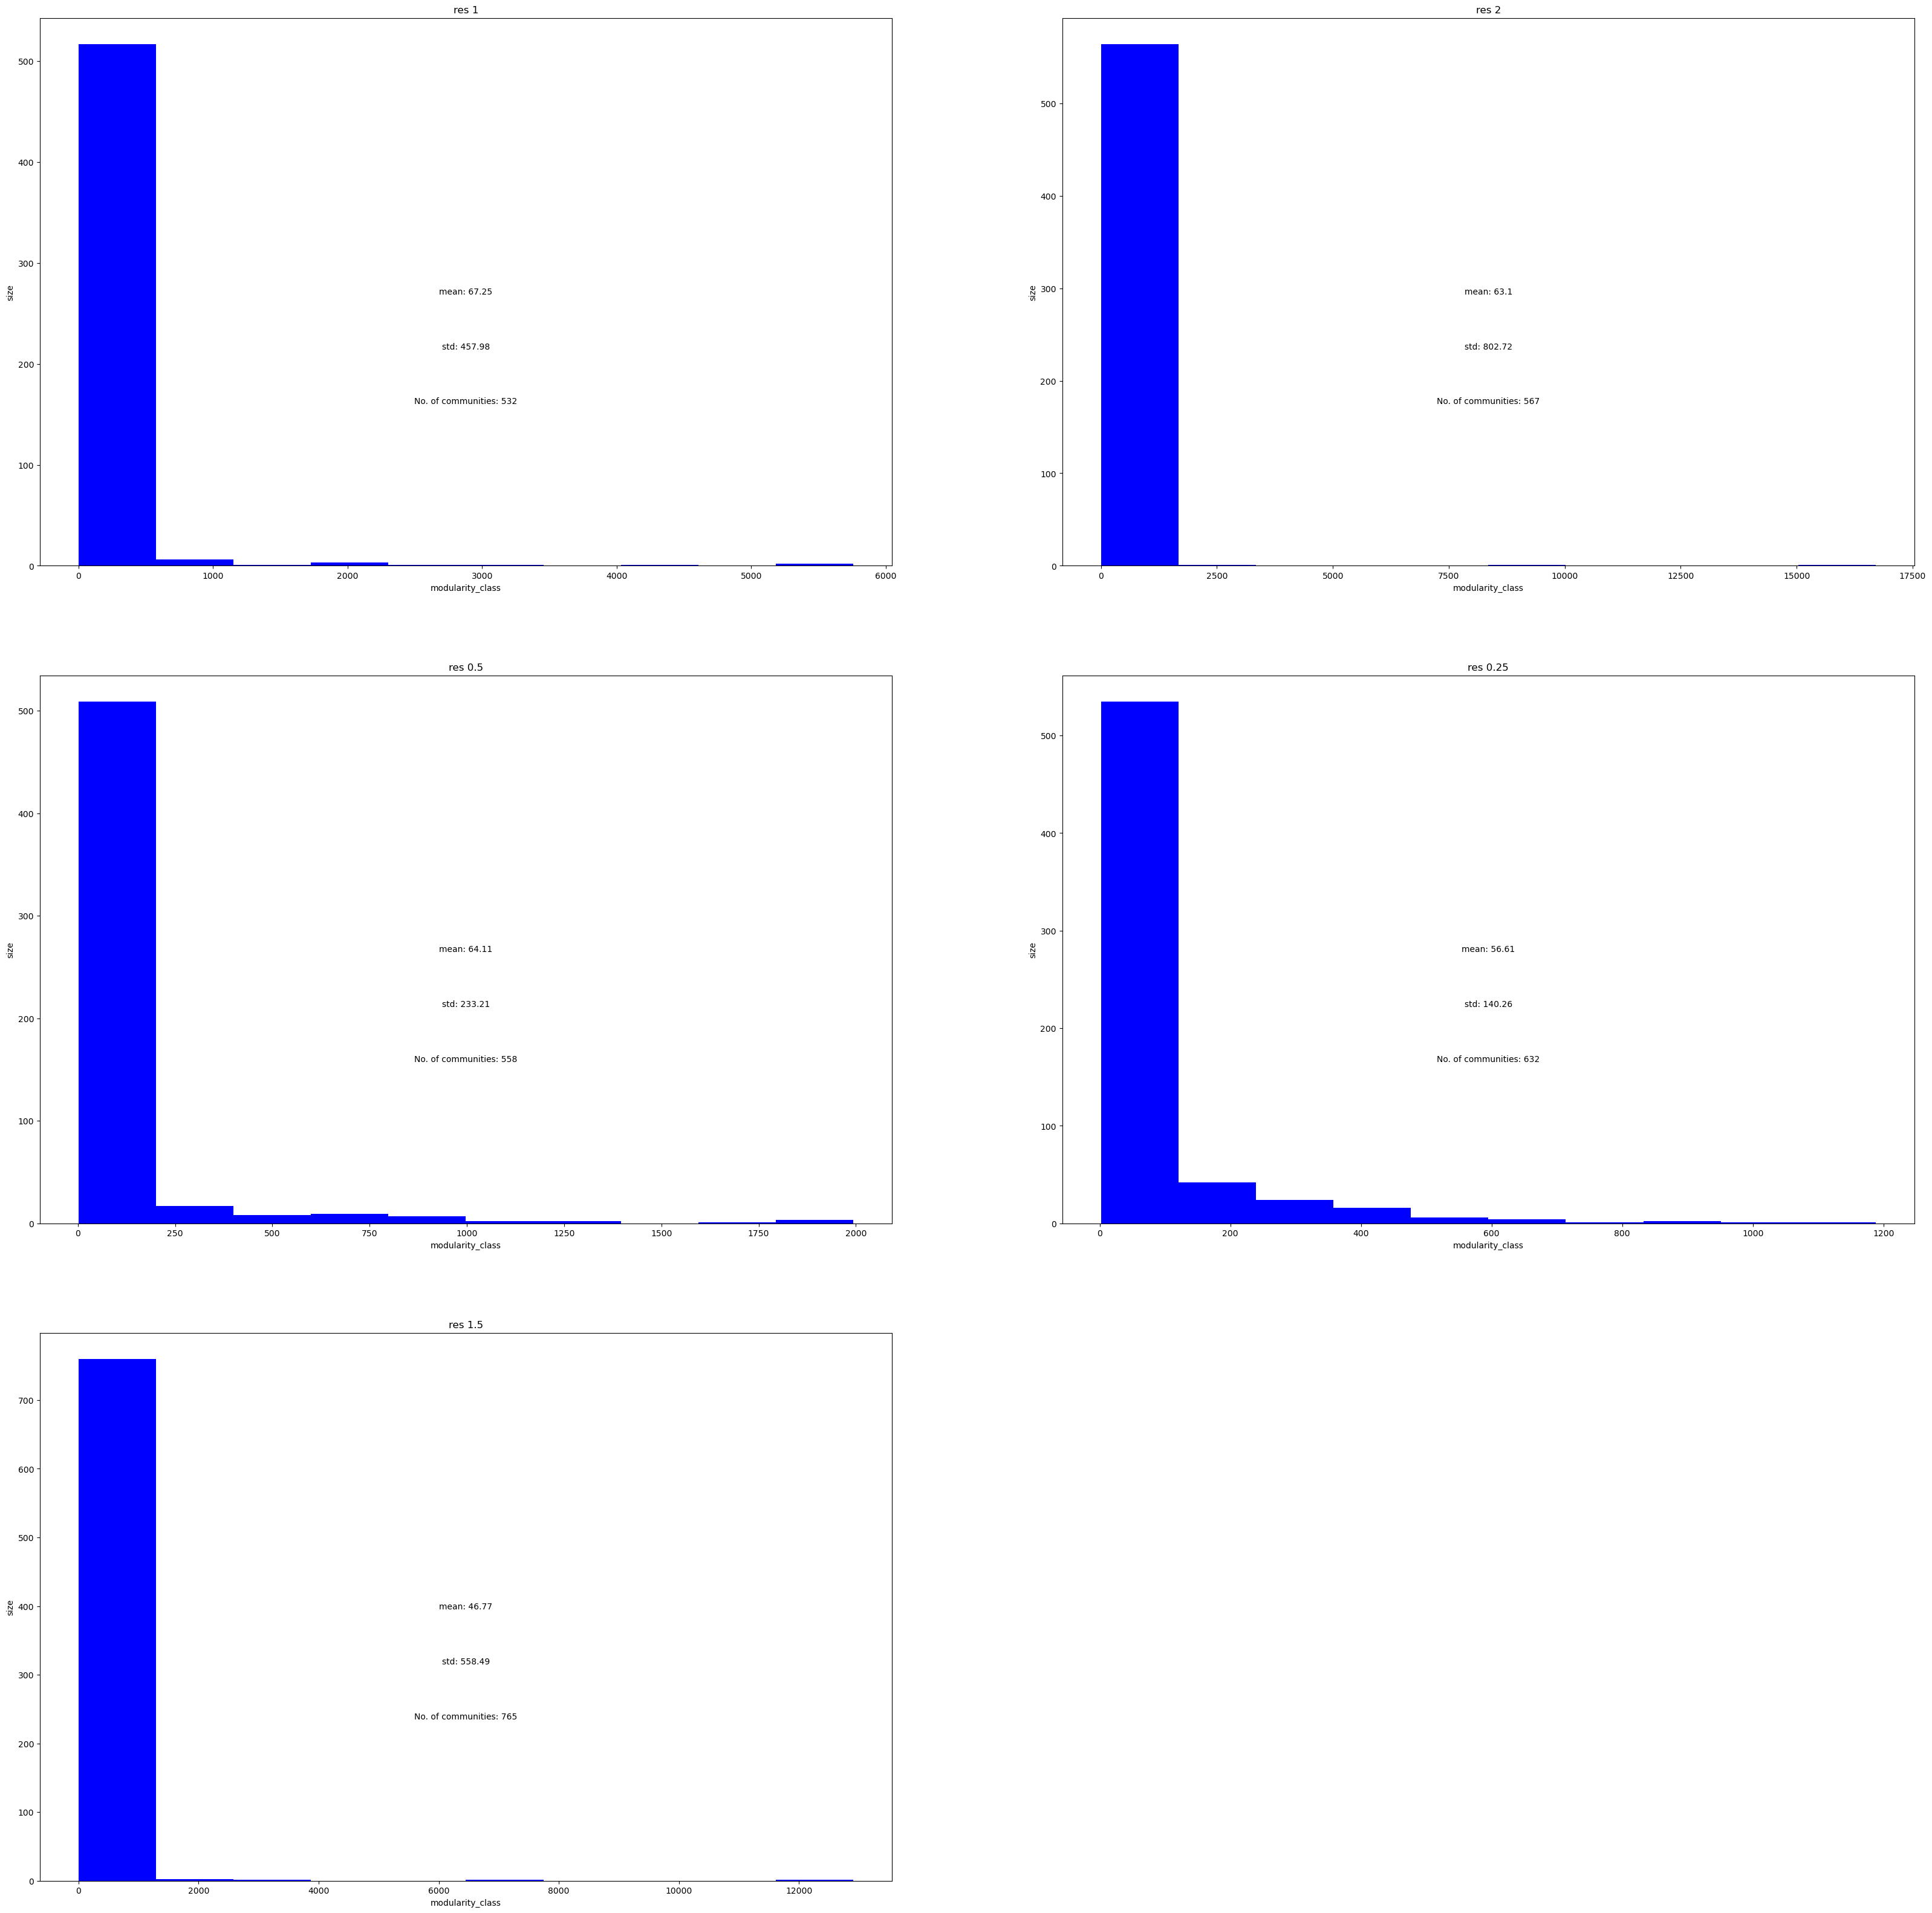

In [63]:
# create 5 subplots
fig, axs = plt.subplots(3,2, figsize=(20, 20))

# plot res1
axs[0,0].hist(res1.groupby('modularity_class').size(), bins=10, color='blue')
axs[0,0].set_title('res 1')
axs[0,0].set_xlabel('modularity_class')
axs[0,0].set_ylabel('size')
axs[0,0].text(0.5, 0.5, 'mean: ' + str(res1_mean), horizontalalignment='center', verticalalignment='center', transform=axs[0,0].transAxes)
axs[0,0].text(0.5, 0.4, 'std: ' + str(res1_std), horizontalalignment='center', verticalalignment='center', transform=axs[0,0].transAxes)
axs[0,0].text(0.5, 0.3, 'No. of communities: ' + str(res1_size), horizontalalignment='center', verticalalignment='center', transform=axs[0,0].transAxes)

# plot res2
axs[0,1].hist(res2.groupby('modularity_class').size(), bins=10, color='blue')
axs[0,1].set_title('res 2')
axs[0,1].set_xlabel('modularity_class')
axs[0,1].set_ylabel('size')
axs[0,1].text(0.5, 0.5, 'mean: ' + str(res2_mean), horizontalalignment='center', verticalalignment='center', transform=axs[0,1].transAxes)
axs[0,1].text(0.5, 0.4, 'std: ' + str(res2_std), horizontalalignment='center', verticalalignment='center', transform=axs[0,1].transAxes)
axs[0,1].text(0.5, 0.3, 'No. of communities: ' + str(res2_size), horizontalalignment='center', verticalalignment='center', transform=axs[0,1].transAxes)

# plot res05
axs[1,0].hist(res05.groupby('modularity_class').size(), bins=10, color='blue')
axs[1,0].set_title('res 0.5')
axs[1,0].set_xlabel('modularity_class')
axs[1,0].set_ylabel('size')
axs[1,0].text(0.5, 0.5, 'mean: ' + str(res05_mean), horizontalalignment='center', verticalalignment='center', transform=axs[1,0].transAxes)
axs[1,0].text(0.5, 0.4, 'std: ' + str(res05_std), horizontalalignment='center', verticalalignment='center', transform=axs[1,0].transAxes)
axs[1,0].text(0.5, 0.3, 'No. of communities: ' + str(res05_size), horizontalalignment='center', verticalalignment='center', transform=axs[1,0].transAxes)

# plot res025
axs[1,1].hist(res025.groupby('modularity_class').size(), bins=10, color='blue')
axs[1,1].set_title('res 0.25')
axs[1,1].set_xlabel('modularity_class')
axs[1,1].set_ylabel('size')
axs[1,1].text(0.5, 0.5, 'mean: ' + str(res025_mean), horizontalalignment='center', verticalalignment='center', transform=axs[1,1].transAxes)
axs[1,1].text(0.5, 0.4, 'std: ' + str(res025_std), horizontalalignment='center', verticalalignment='center', transform=axs[1,1].transAxes)
axs[1,1].text(0.5, 0.3, 'No. of communities: ' + str(res025_size), horizontalalignment='center', verticalalignment='center', transform=axs[1,1].transAxes)

# plot res15
axs[2,0].hist(res15.groupby('modularity_class').size(), bins=10, color='blue')
axs[2,0].set_title('res 1.5')
axs[2,0].set_xlabel('modularity_class')
axs[2,0].set_ylabel('size')
axs[2,0].text(0.5, 0.5, 'mean: ' + str(res15_mean), horizontalalignment='center', verticalalignment='center', transform=axs[2,0].transAxes)
axs[2,0].text(0.5, 0.4, 'std: ' + str(res15_std), horizontalalignment='center', verticalalignment='center', transform=axs[2,0].transAxes)
axs[2,0].text(0.5, 0.3, 'No. of communities: ' + str(res15_size), horizontalalignment='center', verticalalignment='center', transform=axs[2,0].transAxes)

# hide the empty plots
axs[2,1].axis('off')

# save the plot
plt.savefig('task1_a.png', dpi=300)

plt.show()

# Task 1b

Resolution 1 size:  532
Resolution 1 biggest communities:  modularity_class
11    5757
8     5358
7     4408
16    2951
10    2334
0     2084
15    2062
5     1774
6     1391
21     984
dtype: int64


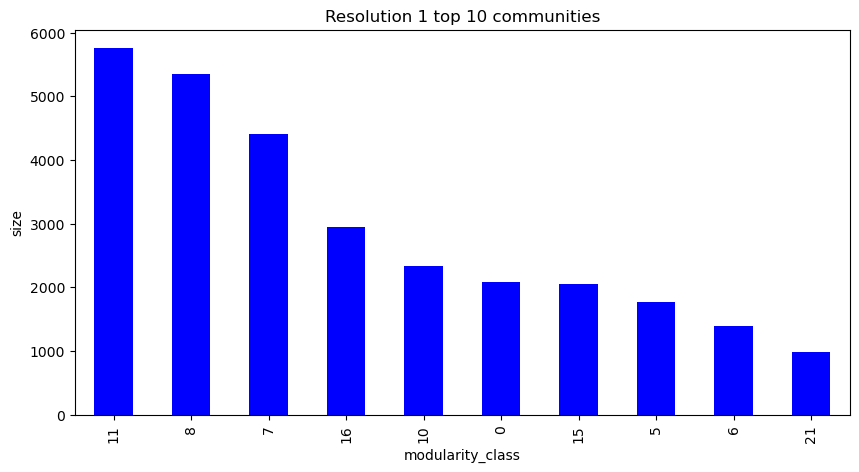

In [9]:
# count the number of communities in res1
res1_size = res1.groupby('modularity_class').size().count()
print('Resolution 1 size: ', res1_size)

# print the biggest communities
res1mod = res1.groupby('modularity_class').size()
print('Resolution 1 biggest communities: ', res1mod.nlargest(10))

# plot the top 10 communities
res1mod.nlargest(10).plot(kind='bar', figsize=(10, 5), color='blue')
plt.title('Resolution 1 top 10 communities')
plt.xlabel('modularity_class')
plt.ylabel('size')
# add percentages to the bars
plt.savefig('top10 communities.png', dpi=300)
plt.show()

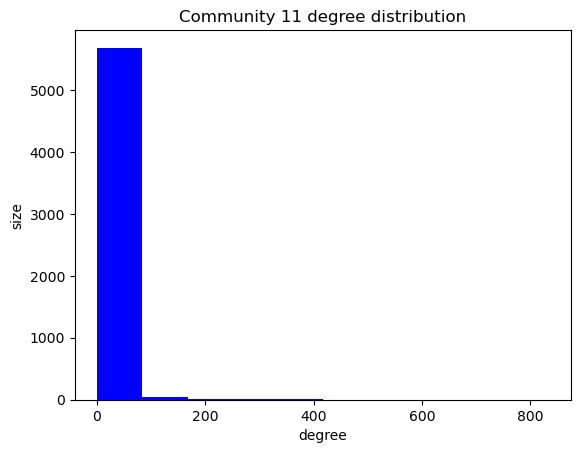

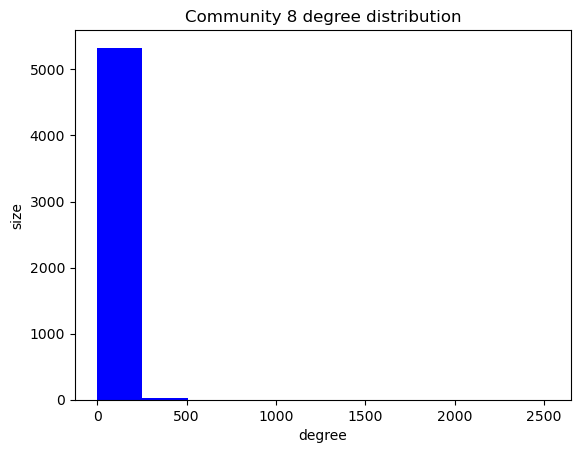

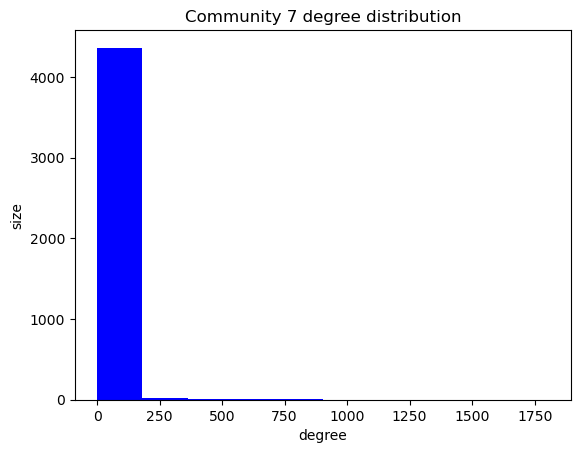

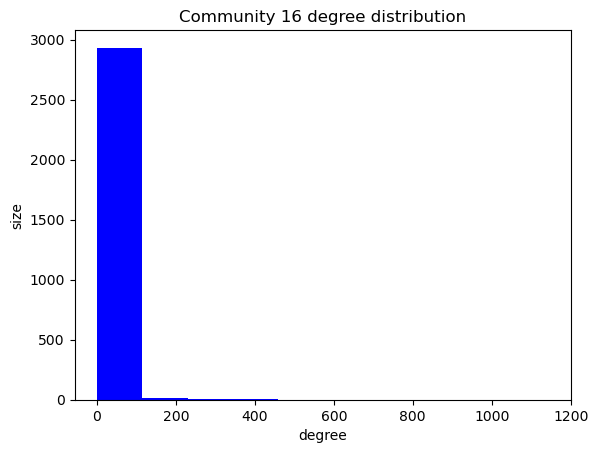

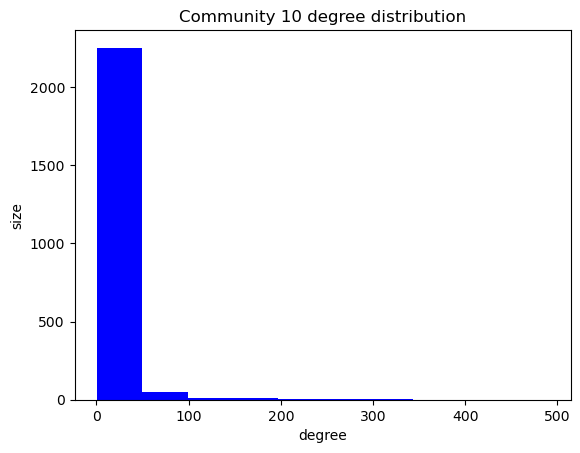

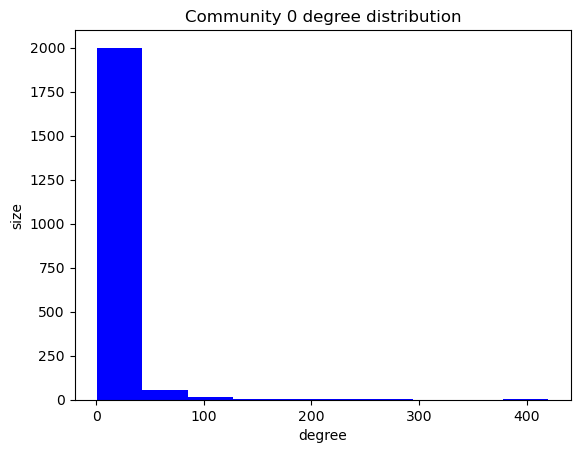

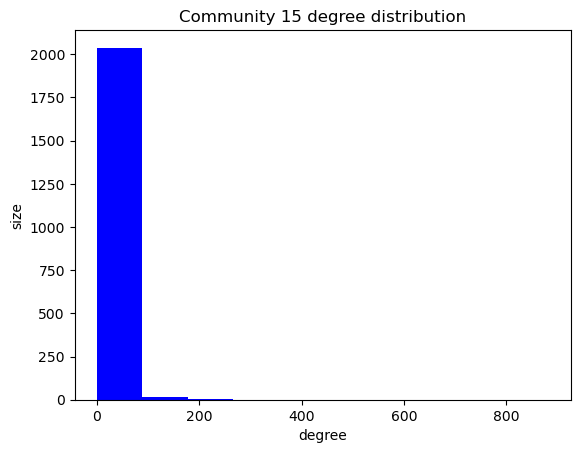

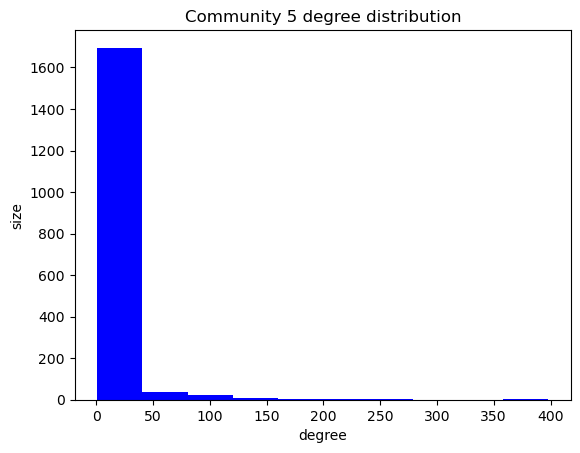

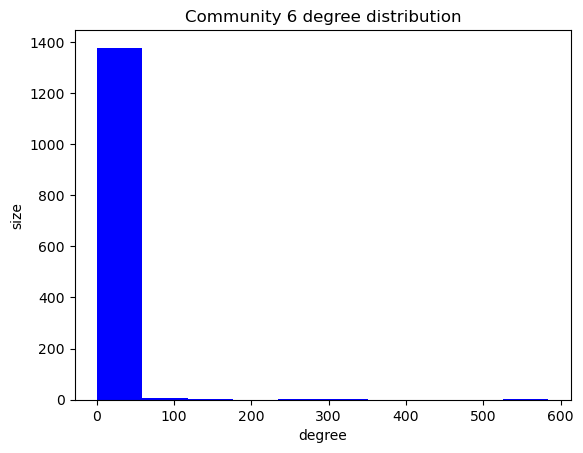

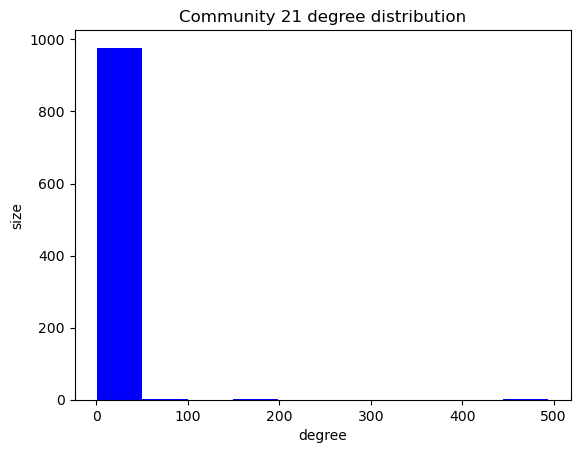

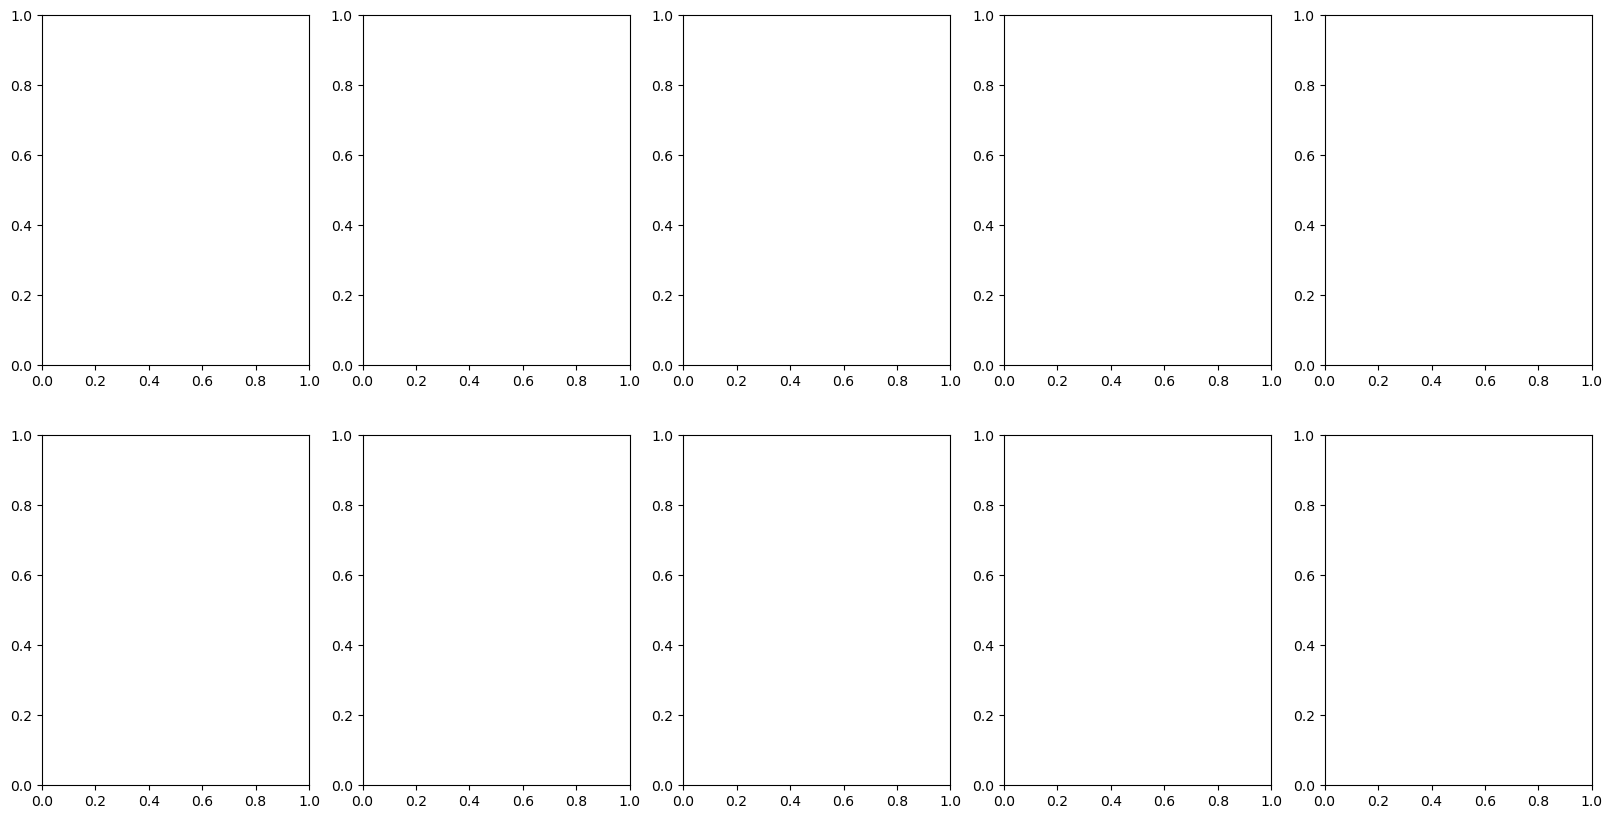

In [27]:
# degree distribution of the top 10 communities and put them in a figure
fig, axs = plt.subplots(2,5, figsize=(20, 10))
for i in res1mod.nlargest(10).index:
    # get the nodes in the community
    nodes = res1[res1['modularity_class'] == i]['Id']
    # get the degree of the nodes
    res1_degrees = res1[res1['Id'].isin(nodes)]['Degree']
    # plot the degree distribution into 1 figure
    plt.hist(res1_degrees, bins=10, color='blue')
    plt.title('Community ' + str(i) + ' degree distribution')
    plt.xlabel('degree')
    plt.ylabel('size')
    plt.savefig('community ' + str(i) + ' degree distribution.png', dpi=300)
    plt.show()


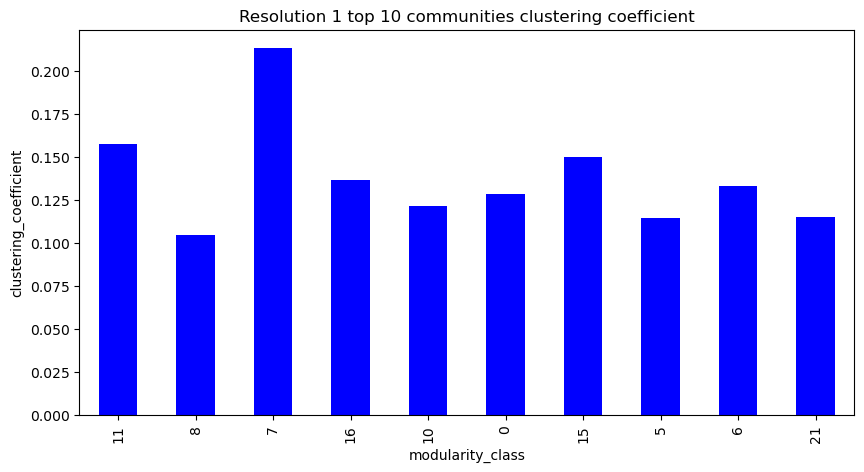

In [49]:
# compare the clustering coefficient of the biggest communities
res1_biggest = res1[res1['modularity_class'].isin(res1mod.nlargest(10).index)]
res1_biggest.groupby('modularity_class').mean()['clustering'].plot(kind='bar', figsize=(10, 5), color='blue')
# sort x axis by community size
plt.gca().set_xticklabels(res1_biggest.groupby('modularity_class').size().sort_values(ascending=False).index)
plt.title('Resolution 1 top 10 communities clustering coefficient')
plt.xlabel('modularity_class')
plt.ylabel('clustering_coefficient')
plt.savefig('top10 communities avg clustering.png', dpi=300)
plt.show()

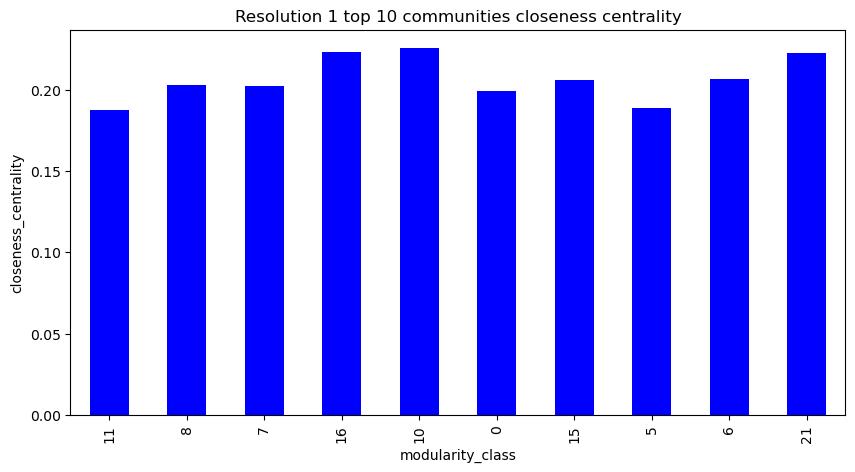

In [28]:
# compare the closeness centrality of the biggest communities
res1_biggest.groupby('modularity_class').mean()['closnesscentrality'].plot(kind='bar', figsize=(10, 5), color='blue')
# sort x axis by community size
plt.gca().set_xticklabels(res1_biggest.groupby('modularity_class').size().sort_values(ascending=False).index)
plt.title('Resolution 1 top 10 communities closeness centrality')
plt.xlabel('modularity_class')
plt.ylabel('closeness_centrality')
plt.savefig('top10 communities avg closeness.png', dpi=300)
plt.show()


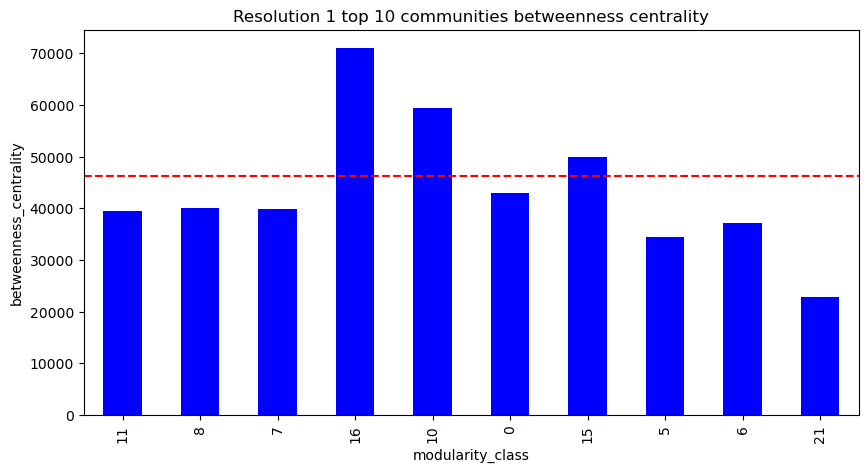

In [64]:
# compare the betweenness centrality of the biggest communities
res1_biggest.groupby('modularity_class').mean()['betweenesscentrality'].plot(kind='bar', figsize=(10, 5), color='blue')
# sort x axis by community size
plt.gca().set_xticklabels(res1_biggest.groupby('modularity_class').size().sort_values(ascending=False).index)
plt.title('Resolution 1 top 10 communities betweenness centrality')
plt.xlabel('modularity_class')
plt.ylabel('betweenness_centrality')
# the average betweeness centrality for the whole network
plt.axhline(y=res1['betweenesscentrality'].mean(), color='r', linestyle='--')
plt.savefig('top10 communities avg betweenness.png', dpi=300)
plt.show()

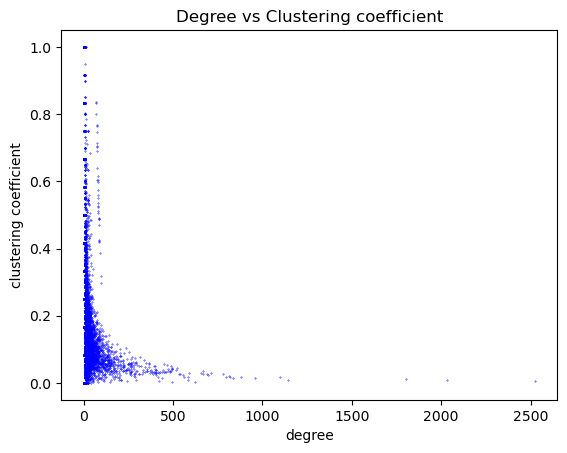

In [16]:
# make a plot of degree vs clustering coefficient
plt.scatter(res1['Degree'], res1['clustering'], s=0.1, color='blue')
plt.title('Degree vs Clustering coefficient')
plt.xlabel('degree')
plt.ylabel('clustering coefficient')
plt.savefig('degree vs clustering.png', dpi=300)
plt.show()

In [72]:
# # plot the top 10 nodes with the highest betweenness centrality
# res1.sort_values(by='betweenesscentrality', ascending=False).head(10).plot(kind='bar', x='Id', y='betweenesscentrality', figsize=(10, 5), color='blue')
# plt.title('Top 10 nodes with the highest betweenness centrality')
# plt.xlabel('node')
# plt.ylabel('betweenness centrality')
# # display the modularity class of the node
# for i in range(10):
#     plt.text(i, res1.sort_values(by='betweenesscentrality', ascending=False).head(10)['betweenesscentrality'].iloc[i], 'modularity class: ' + str(res1.sort_values(by='betweenesscentrality', ascending=False).head(10)['modularity_class'].iloc[i]))

Percentage of nodes in the top 10 communities:  0.8134783094812165
Percentage of nodes in the top 100 communities:  0.9758497316636852


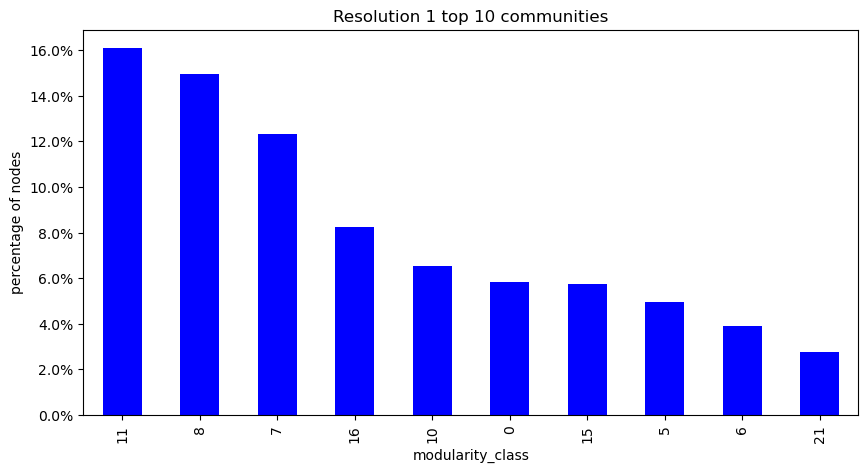

In [47]:
import matplotlib.ticker as mtick
# Percetage of nodes in the top 10 communities
print('Percentage of nodes in the top 10 communities: ', res1mod.nlargest(10).sum() / res1mod.sum())

# Percentage of nodes in the top 100 communities
print('Percentage of nodes in the top 100 communities: ', res1mod.nlargest(100).sum() / res1mod.sum())

# bar chat of the 10 biggest communities and their percentage of nodes in the network
(res1mod.nlargest(10) / res1mod.sum()).plot(kind='bar', figsize=(10, 5), color='blue')
plt.title('Resolution 1 top 10 communities')
plt.xlabel('modularity_class')
plt.ylabel('percentage of nodes')
# change y axis to percentage format
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
# make bar chart horizontal
plt.savefig('top10 communities percentage.png', dpi=300)
plt.show()

Average degree for the res1 network:  7.704662343470483


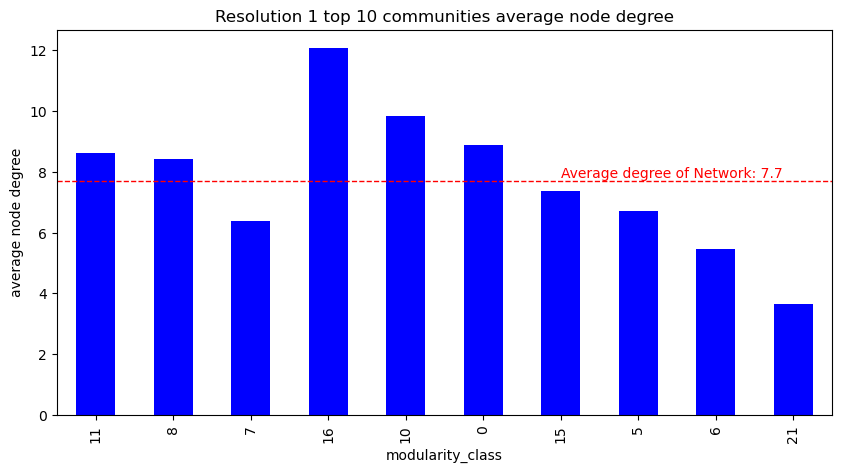

In [62]:
# average degree for the res1 network
print('Average degree for the res1 network: ', res1['Degree'].mean())
# top 10 communities average node degree
res1_biggest.groupby('modularity_class').mean()['Degree'].plot(kind='bar', figsize=(10, 5), color='blue')
# sort x axis by community size
plt.gca().set_xticklabels(res1_biggest.groupby('modularity_class').size().sort_values(ascending=False).index)
plt.title('Resolution 1 top 10 communities average node degree')
plt.xlabel('modularity_class')
plt.ylabel('average node degree')
# annotate the average degree of the whole network
plt.axhline(res1['Degree'].mean(), color='red', linestyle='dashed', linewidth=1)
# label the average degree of the whole network
plt.text(6, res1['Degree'].mean() + 0.1, 'Average degree of Network: ' + str(round(res1['Degree'].mean(), 2)), color='red')
plt.savefig('top10 communities avg degree.png', dpi=300)
plt.show()

In [10]:
# # similarities and dissimilarities in res1

# # create a list of all the communities

# communities = []

# for i in range(res1_size):
#     communities.append(res1[res1['modularity_class'] == i].index.tolist())

# # count the number of communities in res1

# print('Number of communities in res1: ' + str(res1_size))

# # create a list of all the pairs of communities

# pairs = []

# for i in range(res1_size):
#     for j in range(i+1, res1_size):
#         pairs.append([i, j])

# # create a list of all the similarities and dissimilarities

# similarity = []

# for pair in pairs:
#     similarity.append(len(set(communities[pair[0]]).intersection(set(communities[pair[1]]))))

# # count the number of similar communities

# similar = 0

# for i in similarity:
#     if i > 0:
#         similar += 1

# print('Number of similar communities in res1: ' + str(similar))

# # create a list of all the similarities and dissimilarities

# dissimilarity = []

# for pair in pairs:
#     dissimilarity.append(len(set(communities[pair[0]]).symmetric_difference(set(communities[pair[1]]))))

# # count the number of dissimilar communities

# dissimilar = 0

# for i in dissimilarity:
#     if i > 0:
#         dissimilar += 1

# print('Number of dissimilar communities in res1: ' + str(dissimilar))

# # plot the similarities and dissimilarities

# fig, axs = plt.subplots(1,2, figsize=(20, 10))

# axs[0].hist(similarity, bins=10, color='blue')
# axs[0].set_title('Similarities')
# axs[0].set_xlabel('size')
# axs[0].set_ylabel('frequency')

# axs[1].hist(dissimilarity, bins=10, color='blue')
# axs[1].set_title('Dissimilarities')
# axs[1].set_xlabel('size')
# axs[1].set_ylabel('frequency')

# plt.savefig('task1_b.png', dpi=300)

# plt.show()